### Exploratory Data Analysis ###

Importing libraries 

In [63]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### Import data into pandas dataframe ### 

In [64]:
heart_disease_df = pd.read_csv("heart_disease_uci.csv")
heart_disease_df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


### Check for missing values in data set ### 

In [65]:
heart_disease_df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [66]:
# show all features that have missing values 
[feature for feature in heart_disease_df.columns if heart_disease_df[feature].isna().sum() > 0]

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

<Axes: >

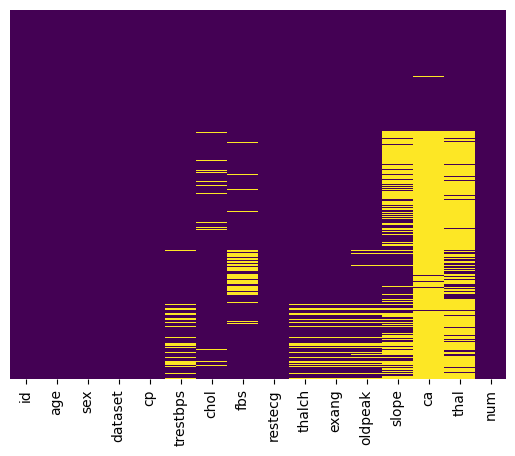

In [67]:
# using a heatmap to show the same features with missing values 
sns.heatmap(heart_disease_df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

## Using Chi-Square Test between target variable (num) and features with missing values to see if there is a statistical relationship between them ### 

In [68]:
from scipy.stats import chi2_contingency

In [69]:
# create contingency table 
thal_num_df = heart_disease_df[["thal", "num"]]
thal_num_df = thal_num_df.dropna()

thal = thal_num_df["thal"]
num = thal_num_df["num"]
contingency_table = pd.crosstab(thal, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between thal and num.")
else:
    print("There is no significant association between thal and num.")

Chi-Square Statistic: 114.08119532134354
P-value: 5.5083128087344495e-21
Degrees of Freedom: 8
Expected Frequencies:
 [[19.8202765  11.23502304  6.67741935  6.57142857  1.69585253]
 [84.4516129  47.87096774 28.4516129  28.          7.22580645]
 [82.7281106  46.89400922 27.87096774 27.42857143  7.07834101]]
There is a significant association between thal and num.


In [70]:
# create contingency table 
ca_num_df = heart_disease_df[["ca", "num"]]
ca_num_df = ca_num_df.dropna()

ca = ca_num_df["ca"]
num = ca_num_df["num"]
contingency_table = pd.crosstab(ca, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between ca and num.")
else:
    print("There is no significant association between ca and num.")

Chi-Square Statistic: 112.25917956288063
P-value: 2.1366337175556998e-18
Degrees of Freedom: 12
Expected Frequencies:
 [[96.65048544 33.97411003 21.08737864 21.67313916  7.61488673]
 [35.77669903 12.57605178  7.80582524  8.02265372  2.81877023]
 [21.89320388  7.69579288  4.77669903  4.90938511  1.72491909]
 [10.67961165  3.75404531  2.33009709  2.39482201  0.84142395]]
There is a significant association between ca and num.


In [71]:
# create contingency table 
slope_num_df = heart_disease_df[["slope", "num"]]
slope_num_df = slope_num_df.dropna()

slope = slope_num_df["slope"]
num = slope_num_df["num"]
contingency_table = pd.crosstab(slope, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between slope and num.")
else:
    print("There is no significant association between slope and num.")

Chi-Square Statistic: 104.1291484912597
P-value: 6.10061701015126e-19
Degrees of Freedom: 8
Expected Frequencies:
 [[ 22.47790507  20.41571195   9.27986907   8.35188216   2.47463175]
 [123.09328969 111.80032733  50.81833061  45.73649755  13.55155483]
 [ 72.42880524  65.78396072  29.90180033  26.91162029   7.97381342]]
There is a significant association between slope and num.


In [72]:
# create contingency table 
fbs_num_df = heart_disease_df[["fbs", "num"]]
fbs_num_df = fbs_num_df.dropna()

fbs = fbs_num_df["fbs"]
num = fbs_num_df["num"]
contingency_table = pd.crosstab(fbs, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between fbs and num.")
else:
    print("There is no significant association between fbs and num.")

Chi-Square Statistic: 24.67315549603282
P-value: 5.852437165074865e-05
Degrees of Freedom: 4
Expected Frequencies:
 [[330.99277108 187.59036145  73.3686747   78.37108434  21.67710843]
 [ 66.00722892  37.40963855  14.6313253   15.62891566   4.32289157]]
There is a significant association between fbs and num.


In [73]:
# pie chart for showing num distribution 
num_types = heart_disease_df.num.value_counts().index
num_types

Index([0, 1, 2, 3, 4], dtype='int64', name='num')

In [74]:
num_freq = heart_disease_df.num.value_counts().values
num_freq

array([411, 265, 109, 107,  28], dtype=int64)

([<matplotlib.patches.Wedge at 0x1a8fa3290a0>,
 [Text(0.1831986836988545, 1.084637378247222, '0'),
  Text(-0.9259323264768218, -0.5938428468755185, '1'),
  Text(0.30039165571367216, -1.0581894221629693, '2'),
  Text(0.9339570528734981, -0.5811404506553043, '3'),
  Text(1.0949757383194476, -0.10501491556812542, '4')],
 [Text(0.09992655474482971, 0.5916203881348483, '44.674%'),
  Text(-0.5050539962600845, -0.3239142801139191, '28.804%'),
  Text(0.16384999402563932, -0.5771942302707105, '11.848%'),
  Text(0.5094311197491806, -0.31698570035743867, '11.630%'),
  Text(0.5972594936287896, -0.05728086303715931, '3.043%')])

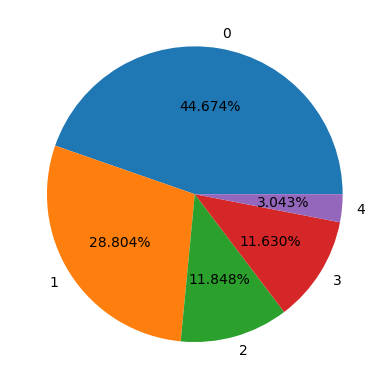

In [75]:
plt.pie(num_freq, labels = num_types, autopct = "%1.3f%%")

Observation: 45% of patients did not have heart disease, 55% of patients do have heart disease

### Checking for relationships between other features ###